In [1]:
# ws01
from sklearn.datasets import load_breast_cancer

from sklearn import metrics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

cancer = load_breast_cancer()

In [2]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [3]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [4]:
df = pd.DataFrame(cancer.data, columns=cancer.feature_names)

df['class'] = cancer.target
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [5]:
df.shape

(569, 31)

In [6]:
df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
class                      0
dtype: int64

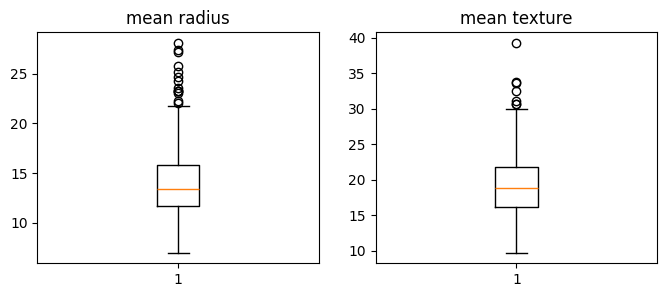

In [7]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 3))

ax1.set_title('mean radius')
ax1.boxplot(df['mean radius'])

ax2.set_title('mean texture')
ax2.boxplot(df['mean texture'])
plt.show()

In [8]:
df = df[df['mean radius'] < 25]
df = df[df['mean texture'] < 38]
df.shape

(563, 31)

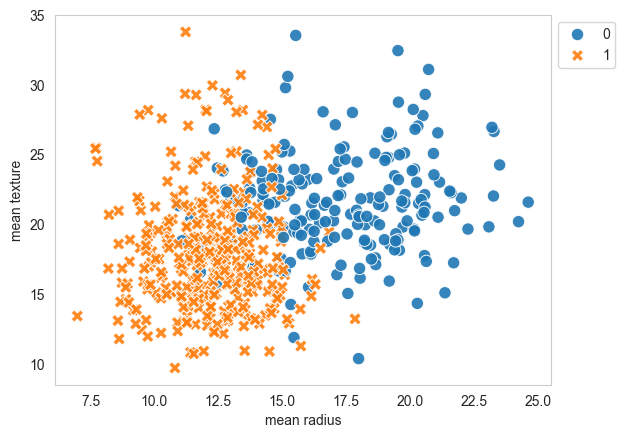

In [10]:
sns.set_style('whitegrid')

sns.scatterplot(x='mean radius',y='mean texture', data=df, hue='class', style='class', 
                alpha=0.9, edgecolor='w', s=80)

plt.grid(False)
plt.legend(loc='upper left',bbox_to_anchor=(1, 1)) 

plt.show()

### ws 02

In [11]:

df['mean ra'] = np.where(df['class']==0, df['mean radius'] + 7.5, df['mean radius'])
df['mean ra'].head()

0    25.49
1    28.07
2    27.19
3    18.92
4    27.79
Name: mean ra, dtype: float64

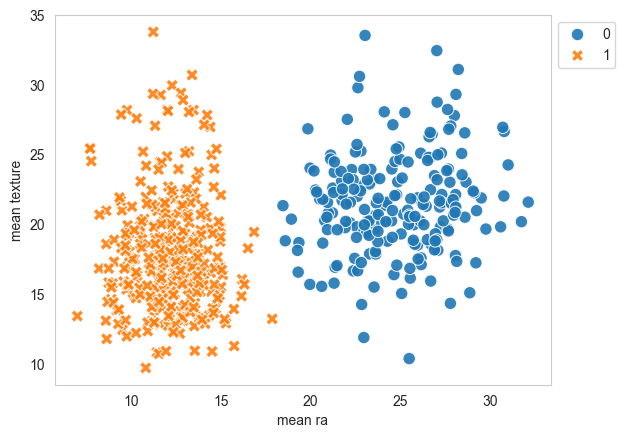

In [12]:
sns.scatterplot(x='mean ra',y='mean texture', data=df, hue='class', style='class', 
                alpha=0.9, edgecolor='w', s=80)

plt.grid(False)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1)) 
plt.show()

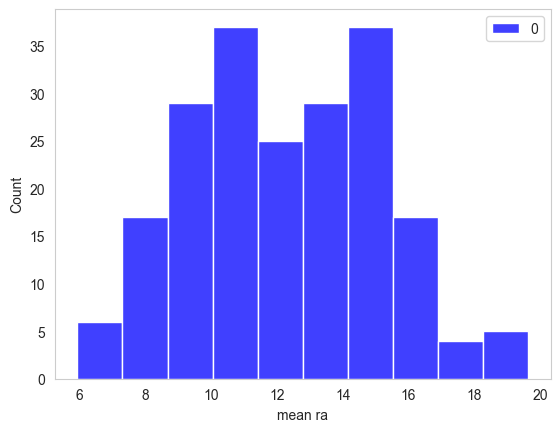

In [38]:

sns.histplot(df['mean ra'][df['class']==0], label='0', color='b')
sns.histplot(df['mean ra'][df['class']==1], label='1', color='r')
plt.legend()
plt.grid(False)
plt.show()

In [14]:
columns = ['mean ra','mean texture']
X = df[columns]
y = df['class']
X.shape , y.shape , y.unique()


((563, 2), (563,), array([0, 1]))

In [15]:
X[:3]

,mean ra,mean texture
0,25.49,10.38
1,28.07,17.77
2,27.19,21.25


In [16]:
y[:3]

0    0
1    0
2    0
Name: class, dtype: int32

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=10)

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix


model = LogisticRegression(solver='lbfgs')
model.fit(X_train, y_train)

print("Score: {:.3f}".format(model.score(X_test, y_test))) 

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred, target_names=['No','Yes']))
cm = confusion_matrix(y_test, y_pred)
print(cm)

Score: 1.000
              precision    recall  f1-score   support

          No       1.00      1.00      1.00        63
         Yes       1.00      1.00      1.00       106

    accuracy                           1.00       169
   macro avg       1.00      1.00      1.00       169
weighted avg       1.00      1.00      1.00       169

[[ 63   0]
 [  0 106]]


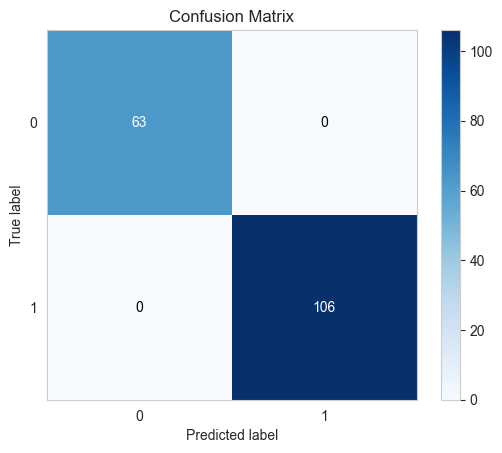

In [19]:
import scikitplot as skplot
skplot.metrics.plot_confusion_matrix(y_test, y_pred)
plt.show()

In [20]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

model = LogisticRegression(solver='lbfgs')

cvs = cross_val_score(model, X, y, cv=10) 
print('cross val scores {}'.format(cvs.round(2)))
print('Average (%) = {:.2f}' .format(cvs.mean() * 100))

cross val scores [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Average (%) = 100.00


In [21]:
model.fit(X_train, y_train)

y_pred_prob = model.predict_proba(X_test) # prob to be 1
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob[:,1])
y_pred_prob[:10].round(3)

array([[0.001, 0.999],
       [0.   , 1.   ],
       [1.   , 0.   ],
       [0.   , 1.   ],
       [1.   , 0.   ],
       [1.   , 0.   ],
       [0.902, 0.098],
       [1.   , 0.   ],
       [1.   , 0.   ],
       [0.   , 1.   ]])

In [22]:
y_pred_prob.shape

(169, 2)

In [23]:
df_result = pd.DataFrame(y_test)
df_result['y_pred'] = y_pred
df_result['y_pred_prob0'] = y_pred_prob[:,0]
df_result['y_pred_prob1'] = y_pred_prob[:,1]

df_result.head(5).round(3)


,class,y_pred,y_pred_prob0,y_pred_prob1
395,1,1,0.001,0.999
266,1,1,0.000,1.000
460,0,0,1.000,0.000
293,1,1,0.000,1.000
78,0,0,1.000,0.000


In [24]:
df_result.groupby('class').count()

,y_pred,y_pred_prob0,y_pred_prob1
class,,,
0,63,63,63
1,106,106,106


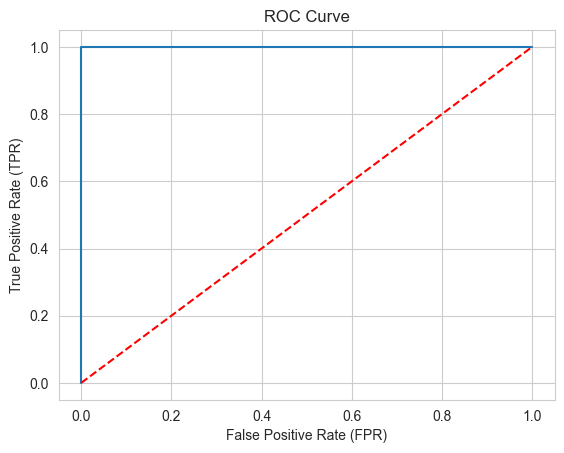

In [25]:
from sklearn.metrics import roc_curve, auc
%matplotlib inline
ll=[0,1]
ur=[0,1]

y_pred_prob = model.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob[:,1])

plt.plot(fpr, tpr) #, label="AUC={:.2f}".format(a))
plt.plot(ll,ur, '--r' )   # color red
plt.title('ROC Curve')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.show()

In [26]:
auc = auc(fpr, tpr)
auc

1.0

## ws03

In [27]:
df['mean ra'] = df['mean radius']
df['mean ra'].head(3)

0    17.99
1    20.57
2    19.69
Name: mean ra, dtype: float64

### ws04

In [28]:
df['mean ra'] = np.where(df['class']==0, df['mean radius'] - 5, df['mean radius'])
df['mean ra'].head(3)

0    12.99
1    15.57
2    14.69
Name: mean ra, dtype: float64

### ws05


In [41]:
idx = df[df['class'] == 1 ].index
df.drop(idx, axis=0, inplace=True)
print(df.shape)
df2 = df.copy()
df2['class'] = 1
df2.head()
# Use pd.concat instead of append
df = pd.concat([df, df2], ignore_index=True)
df['mean ra'] = np.where(df['class']==0, df['mean radius'] +1 , df['mean radius'])
df.shape

(206, 32)


(412, 32)

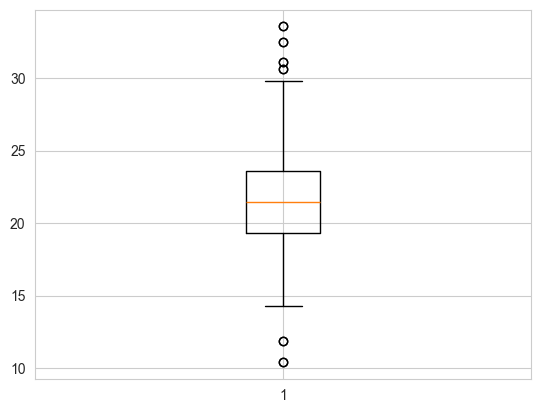

In [42]:
plt.boxplot(df['mean texture']) ; plt.show()

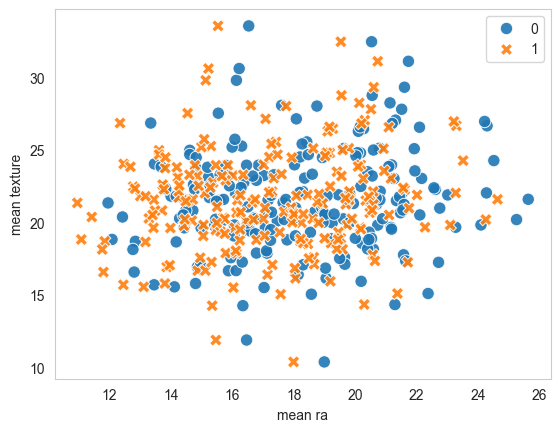

In [44]:
sns.scatterplot(x='mean ra',y='mean texture', data=df, hue='class', style='class', 
                alpha=0.9, edgecolor='w', s=80)
plt.grid(False)
plt.legend(bbox_to_anchor=(1, 1)) 
plt.savefig('case1',dpi=120)
plt.show()

# Threshold

In [45]:
# ws06
df['mean ra'] = df['mean radius']
df['mean ra'].head(3)

0    17.99
1    20.57
2    19.69
Name: mean ra, dtype: float64

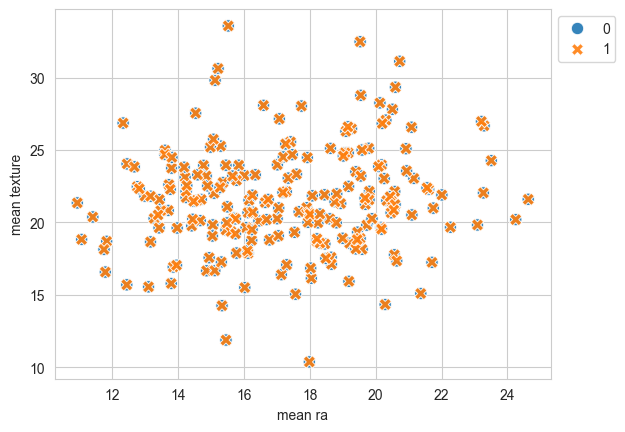

In [47]:

sns.scatterplot(x='mean ra',y='mean texture', data=df, hue='class', style='class', 
                alpha=0.9, edgecolor='w', s=80)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1)) 
plt.show()

In [48]:
columns = ['mean ra','mean texture']
X = df[columns]
y = df['class']
X.shape , y.shape , y.unique()

((412, 2), (412,), array([0, 1], dtype=int64))

In [49]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=10)

from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='lbfgs')
model.fit(X_train, y_train)


threshold = .34
# threshold = .98
y_pred_prob = model.predict_proba(X_test)[:,1] 
y_pred = y_pred_prob > threshold

print(classification_report(y_test, y_pred, target_names=['No','Yes']))

cm = confusion_matrix(y_test, y_pred)
print(cm)

              precision    recall  f1-score   support

          No       0.00      0.00      0.00        65
         Yes       0.48      1.00      0.64        59

    accuracy                           0.48       124
   macro avg       0.24      0.50      0.32       124
weighted avg       0.23      0.48      0.31       124

[[ 0 65]
 [ 0 59]]


C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.

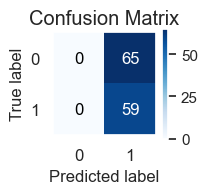

In [54]:
import scikitplot as skplot
sns.set_theme(rc={'figure.figsize':(2.2,2)})
skplot.metrics.plot_confusion_matrix(y_test, y_pred)
plt.tight_layout()
plt.savefig('th2_98_confmatrix',dpi=120)
plt.show()

AUC= 0.4037809647979139


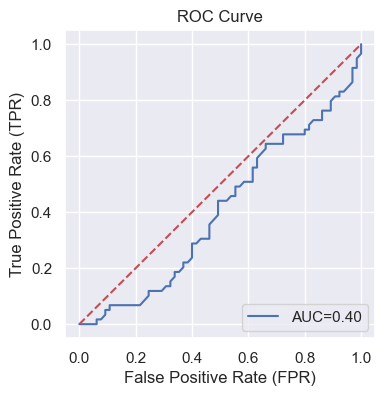

In [53]:
y_pred_prob = model.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob[:,1])
auc = metrics.auc(fpr, tpr)
print('AUC=',auc)
a=auc

from sklearn.metrics import roc_curve, auc
%matplotlib inline
ll=[0,1]
ur=[0,1]

# import matplotlib.pyplot as plt
plt.figure(figsize=(4,4))
#plt.rcParams["axes.edgecolor"] = '140' # 180
plt.rcParams["axes.linewidth"]  = 1.25

y_pred_prob = model.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob[:,1])
plt.plot(fpr, tpr, label="AUC={:.2f}".format(a))
plt.plot(ll,ur, '--r' )   # color red
plt.title('ROC Curve')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')  # plt.grid(False)  # plt.savefig('case4_roc', dpi=120, bbox_inches = "tight")
plt.legend(loc="lower right")
plt.show()